Procedo a analizar si hay alguna relacion entre las diferencias de inicio a fin
de la operacion planeadas para la oportunidad. Quiza oportunidades cuya estimacion
de tiempo sea mayor tienden a terminar como perdidas que aquellas que piensan
llevarse a cabo en menos tiempo.

In [7]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('Entrenamieto_ECI_2020.csv').drop_duplicates(subset=['Opportunity_ID'])

#Filtro oportunidades repetidas porque las fechas no cambiar dentro de cada oportunidad

dates = data[['Opportunity_ID', 'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Stage']]
dates = dates[dates['Stage'].isin(['Closed Won', 'Closed Lost'])]

dates.loc[:, 'Stage'].replace({'Closed Won':1, 'Closed Lost':0}, inplace=True)

dates.loc[:, 'Planned_Delivery_Start_Date'] = pd.to_datetime(dates['Planned_Delivery_Start_Date'], 'coerce',
                                                            format='%m/%d/%Y')

dates.loc[:, 'Planned_Delivery_End_Date'] = pd.to_datetime(dates['Planned_Delivery_End_Date'], 'coerce',
                                                            format='%m/%d/%Y')

dates = dates[dates['Opportunity_ID'] != 9773] #Hardcodeo este filtrado porque el id 9773 tiene mal cargada la fecha de delviery end, dando una diferencia de 200 anios xd

#Pongo .loc porque pandas me jode con warnings que son falsos positivos de slice copy.
#Gracias Pandas!

dates['Delta Time'] = dates['Planned_Delivery_End_Date'] - dates['Planned_Delivery_Start_Date']
wonRateByDateDiff = dates.groupby('Delta Time').agg({'Stage':['mean', 'count']}).reset_index()
wonRateByDateDiff['Delta Time'] = wonRateByDateDiff['Delta Time'].dt.days
wonRateByDateDiff.sort_values('Delta Time', inplace=True)

Vemos el grafico del rate de exito para cada diferencia de dias que llevaron las operaciones
sin filtrar por cantidad de datos en princpio

[(0.0, 1.0)]

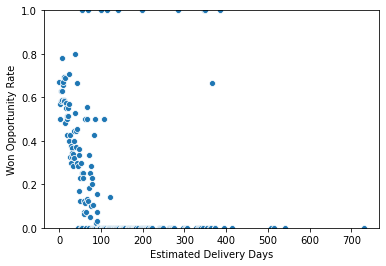

In [8]:
wonRateByDateDiff = wonRateByDateDiff.droplevel(level=0, axis=1)
wonRateByDateDiff.rename(columns={'':'Estimated Delivery Days', 'mean':'Won Opportunity Rate'}, inplace=True)
ax = sns.scatterplot(x='Estimated Delivery Days', y='Won Opportunity Rate', data=wonRateByDateDiff)
ax.set(ylim=(0, 1))

Filtro ahora para tener al menos 10 datos por diferencia de dias, para que no me
contamine tanto la estadistica

[(0.0, 1.0)]

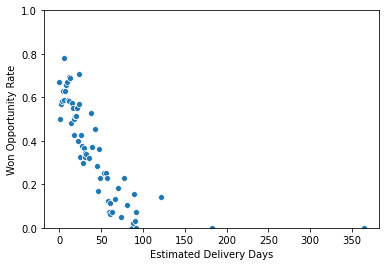

In [9]:
wonRateByDateDiff = wonRateByDateDiff[wonRateByDateDiff['count'] > 10] #Filtro para que no me moleste el ruido de casos con pocos datos, tomo diferencias con al menos 10 ocurrencias
ax = sns.scatterplot(x='Estimated Delivery Days', y='Won Opportunity Rate', data=wonRateByDateDiff)
ax.set(ylim=(0, 1))

Hacemos zoom entre 0 y 100 para ver mejor la concentracion de puntos

[(0.0, 1.0), (0.0, 100.0)]

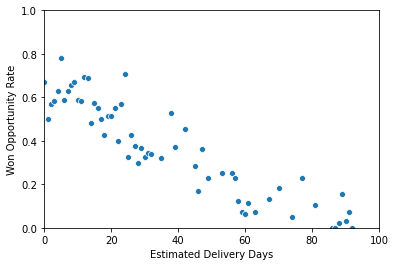

In [10]:
ax = sns.scatterplot(x='Estimated Delivery Days', y='Won Opportunity Rate', data=wonRateByDateDiff)
ax.set(xlim=(0, 100), ylim=(0, 1))

Vemos que esto se ajusta bien a la regresion cuadratica

[(0.0, 1.0), (0.0, 400.0)]

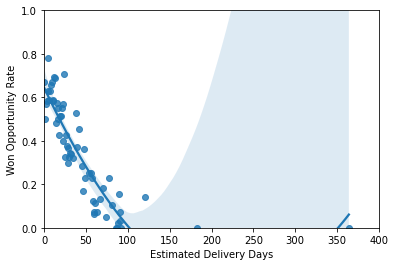

In [11]:
ax = sns.regplot(x='Estimated Delivery Days', y='Won Opportunity Rate', data=wonRateByDateDiff, order=2)
ax.set(xlim=(0, 400), ylim=(0, 1))

Concentrandonos en la zona con mas concentracion de puntos tenemos

[(0.0, 1.0), (0.0, 100.0)]

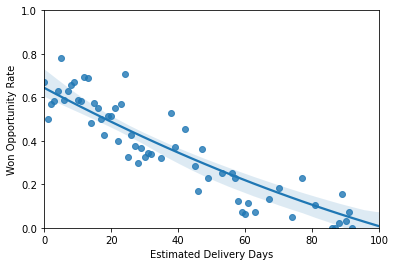

In [12]:
ax = sns.regplot(x='Estimated Delivery Days', y='Won Opportunity Rate', data=wonRateByDateDiff, order=2)
ax.set(xlim=(0, 100), ylim=(0, 1))